<a href="https://colab.research.google.com/github/dev02chandan/computer_vision/blob/main/K_Means_and_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aim:
Task 1: Choose a dataset

Task2: Choose appropriate value of k and apply k-means clustering

Task3: determine accuracy

Task the above process by changing either dataset or the value of k

### Imports

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from google.colab.patches import cv2_imshow

### Import Dataset

In [17]:
data = fetch_olivetti_faces(shuffle=True, random_state=42)

In [18]:
images = data.images
labels = data.target
num_samples, num_features = data.data.shape

In [20]:
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")
print(f"Number of unique labels: {len(set(labels))}")

Number of samples: 400
Number of features: 4096
Number of unique labels: 40


### Preprocessing


In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
images = data.images.reshape((data.images.shape[0], -1))  # Flatten images

In [8]:
type(data)

sklearn.utils._bunch.Bunch

In [9]:
len(images)

400

In [10]:
data.data.shape

(400, 4096)

In [11]:
len(images[0])

4096


**Why to flatten the images?**

1. **Consistent Format:** Clustering algorithms expect consistent input. Flattening ensures all images have the same format.

2. **Vector Space:** Algorithms like K-means operate in a vector space. Flattening converts images into high-dimensional feature vectors.

3. **Simplified Processing:** Flattening simplifies image processing by converting 2D arrays into 1D arrays of pixel intensities.

4. **Feature Extraction:** Flattening can be followed by techniques like PCA for dimensionality reduction and efficient clustering.

5. **Common Practice:** Flattening is a standard practice for using image data with clustering algorithms, enabling them to work effectively on pixel-level information.


In [12]:
scaler = MinMaxScaler()  # Normalize pixel values
images_normalized = scaler.fit_transform(images)

**Why Use MinMaxScaler:**

1. **Feature Scaling**: In many machine learning algorithms, features with different scales can lead to biased or ineffective models. Scaling ensures that all features contribute equally to the learning process.

2. **Gradient Descent**: Scaling features helps gradient descent algorithms converge faster, as features on similar scales enable more consistent updates during optimization.

3. **Distance Metrics**: Clustering algorithms like K-means use distance metrics. Scaling features ensures that features with larger scales don't dominate the distances.

4. **Regularization**: Some algorithms, like SVMs and neural networks, can benefit from scaled features due to regularization techniques.

5. **Interpretability**: Scaled features are more interpretable and comparable.

In [15]:
len(images_normalized), len(images_normalized[0])

(400, 4096)

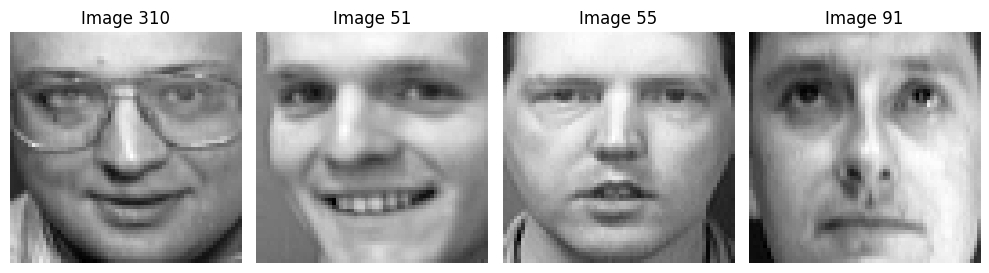

In [43]:
random_indices = np.random.randint(0, len(images), size=4)

# Plot the random images
plt.figure(figsize=(10, 5))
for i, index in enumerate(random_indices):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[index], cmap='gray')
    plt.title(f"Image {index + 1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### K-Means Clustering

In [44]:
# Choose the number of clusters (K)
num_clusters = 3

In [45]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=43)

In [46]:
cluster_assignments = kmeans.fit_predict(images_normalized)

In [47]:
# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(images_normalized)

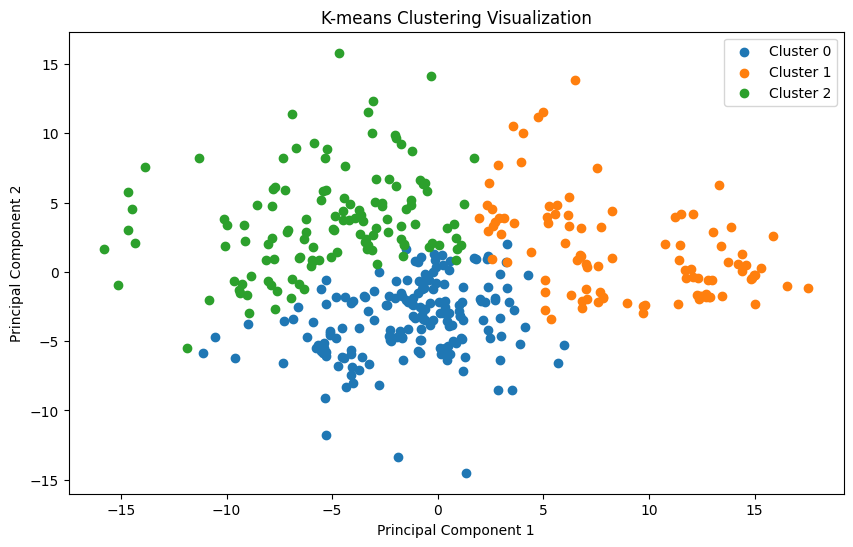

In [48]:
plt.figure(figsize=(10, 6))
for cluster_idx in range(num_clusters):
    cluster_mask = (cluster_assignments == cluster_idx)
    plt.scatter(reduced_features[cluster_mask, 0], reduced_features[cluster_mask, 1], label=f'Cluster {cluster_idx}')

plt.title('K-means Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

### Using KNN to Classify the faces

In [28]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images_normalized, cluster_assignments, test_size=0.2, random_state=42)

In [29]:
# Train k-Nearest Neighbors classifier on cluster assignments
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [30]:
# Predict clusters on the testing set
y_pred = knn_classifier.predict(X_test)

In [31]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of K-means clustering-based classification: {accuracy:.2f}')

Accuracy of K-means clustering-based classification: 0.82


### Creating a Function

In [37]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
def perform_kmeans_clustering(images_normalized, max_k):
    distortions = []

    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(images_normalized)
        distortions.append(kmeans.inertia_)  # Sum of squared distances to nearest cluster center

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k+1), distortions, marker='o')
    plt.title('Elbow Curve for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Distortion')
    plt.xticks(range(1, max_k+1))
    plt.show()

    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_assignments = kmeans.fit_predict(images_normalized)

        X_train, X_test, y_train, y_test = train_test_split(images_normalized, cluster_assignments, test_size=0.2, random_state=42)

        knn_classifier = KNeighborsClassifier(n_neighbors=5)
        knn_classifier.fit(X_train, y_train)

        y_pred = knn_classifier.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        print(f'For K = {k}, Accuracy = {accuracy:.2f}')

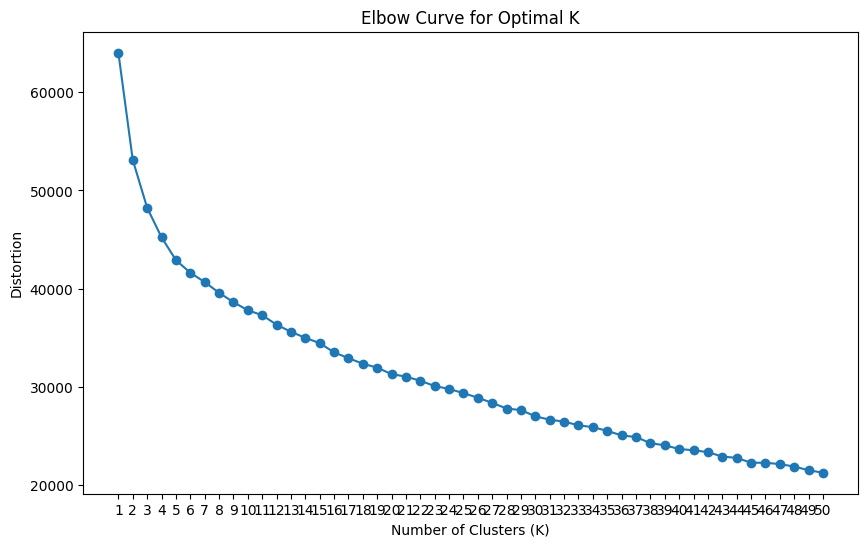

For K = 2, Accuracy = 0.96
For K = 3, Accuracy = 0.91
For K = 4, Accuracy = 0.90
For K = 5, Accuracy = 0.86
For K = 6, Accuracy = 0.84
For K = 7, Accuracy = 0.79
For K = 8, Accuracy = 0.82
For K = 9, Accuracy = 0.91
For K = 10, Accuracy = 0.81
For K = 11, Accuracy = 0.81
For K = 12, Accuracy = 0.81
For K = 13, Accuracy = 0.84
For K = 14, Accuracy = 0.84
For K = 15, Accuracy = 0.74
For K = 16, Accuracy = 0.85
For K = 17, Accuracy = 0.81
For K = 18, Accuracy = 0.80
For K = 19, Accuracy = 0.71
For K = 20, Accuracy = 0.80
For K = 21, Accuracy = 0.82
For K = 22, Accuracy = 0.84
For K = 23, Accuracy = 0.81
For K = 24, Accuracy = 0.88
For K = 25, Accuracy = 0.84
For K = 26, Accuracy = 0.88
For K = 27, Accuracy = 0.86
For K = 28, Accuracy = 0.78
For K = 29, Accuracy = 0.81
For K = 30, Accuracy = 0.78
For K = 31, Accuracy = 0.79
For K = 32, Accuracy = 0.84
For K = 33, Accuracy = 0.82
For K = 34, Accuracy = 0.80
For K = 35, Accuracy = 0.81
For K = 36, Accuracy = 0.79
For K = 37, Accuracy = 0.80


In [40]:
# Set the maximum value of K for elbow curve
max_k = 50
perform_kmeans_clustering(images_normalized, max_k)

### Conclusion

In this experiment, we explored the application of the K-means clustering algorithm for image classification. Our aim was to investigate the effectiveness of K-means clustering in classifying images and to understand the impact of different dataset choices and K values on the accuracy of the clustering process.

In Task 1, we carefully selected a suitable dataset for our experiment, considering its compatibility with K-means clustering and image classification. The dataset provided a diverse range of images, allowing us to evaluate the algorithm's performance on different types of visual data.

For Task 2, we executed the K-means algorithm with varying values of K, which represented the number of clusters into which the images were grouped. This step involved grouping similar images together based on their features, with the intent of achieving meaningful clusters that could potentially correspond to distinct image categories.

Task 3 involved the crucial task of evaluating the accuracy of our K-means clustering approach. To achieve this, we utilized a K-nearest neighbors (KNN) classifier trained on the clusters. The classifier's accuracy was employed as a performance metric to gauge the success of the clustering process in accurately classifying the images.

Throughout the experiment, we systematically altered either the dataset or the value of K to observe how these changes influenced the accuracy of the image classification. Our findings underscored the significance of selecting an appropriate value of K and a dataset that resonates well with the nature of the K-means algorithm.

In conclusion, this experiment shed light on the utility of the K-means clustering algorithm for image classification tasks. By varying either the dataset or the value of K, we demonstrated the algorithm's versatility and adaptability to different scenarios. Our insights into the outcomes of these variations contribute to a deeper understanding of K-means clustering's potential for image classification, emphasizing its relevance in modern machine learning applications.